In [1]:
# Dependcies
import pandas as pd
import glob
import datetime
import time
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


/Users/scott/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
headers_df = pd.read_csv('headers/headers.csv')

In [4]:
colnames = list(headers_df)

In [5]:
colnames

['date',
 'tTime',
 'sequenceNbr',
 'sessionInd',
 'symbol',
 'CPF',
 'contractDelivery',
 'volume',
 'strikePrice',
 'tPrice',
 'AB',
 'IND',
 'MKQ',
 'CO',
 'VOE',
 'PC',
 'CAN',
 'INS',
 'FL',
 'CAB',
 'BKI',
 'entryDate',
 'exchCode']

In [6]:
# Read all market data files and create one large pandas dataframe
# path =r'C:\DRO\DCL_rawdata_files' # use your path
allFiles = glob.glob("*.csv")
frame = pd.DataFrame()
bigData = pd.DataFrame()
for file_ in allFiles:
    print(file_)
    df = pd.read_csv(file_,names=colnames, header=None)
    bigData = bigData.append(df)


20180607-TICK_xnym_ng_fut_0-eth.csv
20180516-TICK_xnym_ng_fut_0-eth.csv
20180523-TICK_xnym_ng_fut_0-eth.csv
20180611-TICK_xnym_ng_fut_0-eth.csv
20180628-TICK_xnym_ng_fut_0-eth.csv
20180507-TICK_xnym_ng_fut_0-eth.csv
20180524-TICK_xnym_ng_fut_0-eth.csv
20180528-TICK_xnym_ng_fut_0-eth.csv
20180511-TICK_xnym_ng_fut_0-eth.csv
20180622-TICK_xnym_ng_fut_0-eth.csv
20180601-TICK_xnym_ng_fut_0-eth.csv
20180510-TICK_xnym_ng_fut_0-eth.csv
20180525-TICK_xnym_ng_fut_0-eth.csv
20180529-TICK_xnym_ng_fut_0-eth.csv


/Users/scott/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


20180522-TICK_xnym_ng_fut_0-eth.csv
20180606-TICK_xnym_ng_fut_0-eth.csv
20180517-TICK_xnym_ng_fut_0-eth.csv
20180629-TICK_xnym_ng_fut_0-eth.csv
20180625-TICK_xnym_ng_fut_0-eth.csv
20180501-TICK_xnym_ng_fut_0-eth.csv
20180615-TICK_xnym_ng_fut_0-eth.csv
20180508-TICK_xnym_ng_fut_0-eth.csv
20180504-TICK_xnym_ng_fut_0-eth.csv
20180619-TICK_xnym_ng_fut_0-eth.csv
20180531-TICK_xnym_ng_fut_0-eth.csv
20180620-TICK_xnym_ng_fut_0-eth.csv
20180627-TICK_xnym_ng_fut_0-eth.csv
20180612-TICK_xnym_ng_fut_0-eth.csv
20180503-TICK_xnym_ng_fut_0-eth.csv
20180604-TICK_xnym_ng_fut_0-eth.csv
20180608-TICK_xnym_ng_fut_0-eth.csv
20180515-TICK_xnym_ng_fut_0-eth.csv
20180613-TICK_xnym_ng_fut_0-eth.csv
20180502-TICK_xnym_ng_fut_0-eth.csv
20180626-TICK_xnym_ng_fut_0-eth.csv
20180518-TICK_xnym_ng_fut_0-eth.csv
20180605-TICK_xnym_ng_fut_0-eth.csv
20180514-TICK_xnym_ng_fut_0-eth.csv
20180521-TICK_xnym_ng_fut_0-eth.csv
20180530-TICK_xnym_ng_fut_0-eth.csv
20180621-TICK_xnym_ng_fut_0-eth.csv
20180614-TICK_xnym_ng_fut_0-

In [7]:
bigData.shape

(1891977, 23)

In [8]:
bigData.columns

Index(['date', 'tTime', 'sequenceNbr', 'sessionInd', 'symbol', 'CPF', 'contractDelivery', 'volume', 'strikePrice', 'tPrice', 'AB', 'IND', 'MKQ', 'CO', 'VOE', 'PC', 'CAN', 'INS', 'FL', 'CAB', 'BKI', 'entryDate', 'exchCode'], dtype='object')

In [9]:
bigData.head()

,date,tTime,sequenceNbr,sessionInd,symbol,CPF,contractDelivery,volume,strikePrice,tPrice,AB,IND,MKQ,CO,VOE,PC,CAN,INS,FL,CAB,BKI,entryDate,exchCode
0,20180607,17:00:00,2177618,E,NG,F,1807,3,0.0,2.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180606,XNYM
1,20180607,17:00:00,2177625,E,NG,F,1807,0,0.0,2.900,NaN,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180606,XNYM
2,20180607,17:00:00,2177652,E,NG,F,1807,1,0.0,2.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180606,XNYM
3,20180607,17:00:01,2177675,E,NG,F,1807,2,0.0,2.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180606,XNYM
4,20180607,17:00:01,2177683,E,NG,F,1807,1,0.0,2.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180606,XNYM


In [10]:
# Code for creating the day of week for the trade

bigData['stringDate'] = bigData['date'].astype(str)
bigData['dow'] = pd.to_datetime(bigData['stringDate'],format='%Y%m%d').dt.weekday_name
bigData['month'] = pd.to_datetime(bigData['stringDate'],format='%Y%m%d').dt.month

In [11]:
bigData.head()

,date,tTime,sequenceNbr,sessionInd,symbol,CPF,contractDelivery,volume,strikePrice,tPrice,AB,IND,MKQ,CO,VOE,PC,CAN,INS,FL,CAB,BKI,entryDate,exchCode,stringDate,dow,month
0,20180607,17:00:00,2177618,E,NG,F,1807,3,0.0,2.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180606,XNYM,20180607,Thursday,6
1,20180607,17:00:00,2177625,E,NG,F,1807,0,0.0,2.900,NaN,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180606,XNYM,20180607,Thursday,6
2,20180607,17:00:00,2177652,E,NG,F,1807,1,0.0,2.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180606,XNYM,20180607,Thursday,6
3,20180607,17:00:01,2177675,E,NG,F,1807,2,0.0,2.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180606,XNYM,20180607,Thursday,6
4,20180607,17:00:01,2177683,E,NG,F,1807,1,0.0,2.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180606,XNYM,20180607,Thursday,6


In [12]:
# Create Kloug timefields

bigData['kTimeYear'] = pd.to_datetime(bigData['date'], format = '%Y%m%d')
bigData['kTimeTime'] = pd.to_datetime(bigData['tTime'], format= '%H:%M:%S').dt.time
bigData['kTime'] = bigData['kTimeYear'].astype(str) + "/" + bigData['kTimeTime'].astype(str)
bigData['kTime'] = pd.to_datetime(bigData['kTime'], format = '%Y-%m-%d/%H:%M:%S')


import datetime as dt
bigData_df = bigData.sort_values('kTime')
bigData_df['kTime'] = (bigData_df['kTime'] + dt.timedelta(hours=5))
bigData_df = bigData_df.sort_values('kTime')
bigData_df.head()



,date,tTime,sequenceNbr,sessionInd,symbol,CPF,contractDelivery,volume,strikePrice,tPrice,AB,IND,MKQ,CO,VOE,PC,CAN,INS,FL,CAB,BKI,entryDate,exchCode,stringDate,dow,month,kTimeYear,kTimeTime,kTime
867,20180501,00:00:00,729831,E,NG,F,1806,2,0.0,2.776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180501,XNYM,20180501,Tuesday,5,2018-05-01,00:00:00,2018-05-01 05:00:00
42322,20180501,00:00:00,559974,E,NG,F,1811,1,0.0,2.856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180501,XNYM,20180501,Tuesday,5,2018-05-01,00:00:00,2018-05-01 05:00:00
39321,20180501,00:00:00,575765,E,NG,F,1809,1,0.0,2.802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180501,XNYM,20180501,Tuesday,5,2018-05-01,00:00:00,2018-05-01 05:00:00
37771,20180501,00:00:00,569903,E,NG,F,1808,1,0.0,2.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180501,XNYM,20180501,Tuesday,5,2018-05-01,00:00:00,2018-05-01 05:00:00
30511,20180501,00:00:00,571225,E,NG,F,1807,1,0.0,2.812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180501,XNYM,20180501,Tuesday,5,2018-05-01,00:00:00,2018-05-01 05:00:00


In [13]:
bigData_df.shape

(1891977, 29)

In [14]:
bigData_df = bigData_df.drop(["AB",'IND','MKQ','VOE','PC','CAN','INS','FL','CAB','BKI'], axis=1)
bigData_df = bigData_df[(bigData_df.CO != "O") & (bigData_df.volume != 0)]
bigData_df.count()

date                1890711
tTime               1890711
sequenceNbr         1890711
sessionInd          1890711
symbol              1890711
CPF                 1890711
contractDelivery    1890711
volume              1890711
strikePrice         1890711
tPrice              1890711
CO                        0
entryDate           1890711
exchCode            1890711
stringDate          1890711
dow                 1890711
month               1890711
kTimeYear           1890711
kTimeTime           1890711
kTime               1890711
dtype: int64

In [15]:
bigData_df = bigData_df.drop(['CO'], axis=1)

In [16]:
bigData_df.count()

date                1890711
tTime               1890711
sequenceNbr         1890711
sessionInd          1890711
symbol              1890711
CPF                 1890711
contractDelivery    1890711
volume              1890711
strikePrice         1890711
tPrice              1890711
entryDate           1890711
exchCode            1890711
stringDate          1890711
dow                 1890711
month               1890711
kTimeYear           1890711
kTimeTime           1890711
kTime               1890711
dtype: int64

In [17]:
bigData_df = bigData_df.drop(["sequenceNbr",'CPF','exchCode','symbol','strikePrice','sessionInd','kTimeYear', 'kTimeTime'], axis=1)

In [18]:
bigData_df = bigData_df.drop(["stringDate"], axis=1)

In [19]:
bigData_df.count()

date                1890711
tTime               1890711
contractDelivery    1890711
volume              1890711
tPrice              1890711
entryDate           1890711
dow                 1890711
month               1890711
kTime               1890711
dtype: int64

In [20]:
bigData_df.dtypes

date                         int64
tTime                       object
contractDelivery             int64
volume                       int64
tPrice                     float64
entryDate                    int64
dow                         object
month                        int64
kTime               datetime64[ns]
dtype: object

In [21]:
bigData_df.head()

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00
42322,20180501,00:00:00,1811,1,2.856,20180501,Tuesday,5,2018-05-01 05:00:00
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00
37771,20180501,00:00:00,1808,1,2.819,20180501,Tuesday,5,2018-05-01 05:00:00
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00


In [ ]:
# Save the dataframe to 

bigData.to_csv('savedData/bigData.csv', header=True)

In [ ]:
# Work area

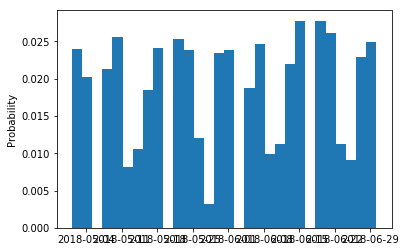

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = bigData_df['kTime'].as_matrix(columns=None)
plt.hist(x, normed=True, bins=30)
plt.ylabel('Probability');

In [ ]:
x

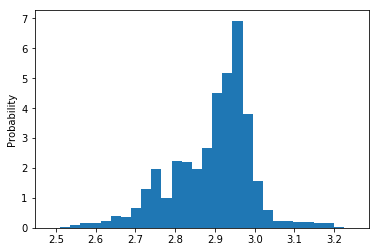

In [23]:
y = bigData_df['tPrice'].as_matrix(columns=None)
plt.hist(y, normed=True, bins=30)
plt.ylabel('Probability');

In [24]:
len(x)

1890711

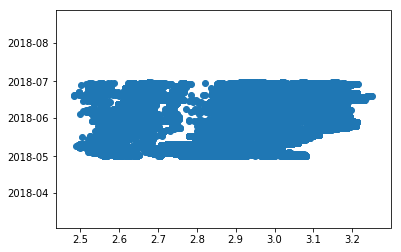

In [25]:
# Plot the data
plt.scatter(y,x)

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [27]:
z = [x,y]

In [ ]:
# z

In [28]:
# Fit the model to the data
kmeans.fit(z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
# Predict the clusters
predicted_clusters = kmeans.predict(z)

In [30]:
predicted_clusters

array([1, 0], dtype=int32)

In [ ]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
# plt.scatter(x,y, c=predicted_clusters, s=50, cmap='viridis')

+++ Elastic Net

In [ ]:
# bigData_df.columns

required fields

date
kTime
volumne
tPrice
ageOrder - difference of tTime and entryTime - replace entryDate column
dow - oneHot encoded
WeathermodelOutput (12 models, 9 days, 2 measurements/day) 216
ProductionmodelOutput (4 columns -  op_cap, schedule_cap, avail_cap, design_cap)

Run regression on time, volume, day. price


Create sample data

In [31]:
import pandas as pd
# sample_df = pd.read_csv('sampleData.csv')

In [32]:
# sample_df.head()

In [33]:
bigData_df.head()

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00
42322,20180501,00:00:00,1811,1,2.856,20180501,Tuesday,5,2018-05-01 05:00:00
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00
37771,20180501,00:00:00,1808,1,2.819,20180501,Tuesday,5,2018-05-01 05:00:00
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00


In [ ]:
# df = pd.DataFrame()

In [ ]:
# bigData_df.head(10)

In [ ]:
# bigData_df.sort_values('ageOrder', ascending=False )

In [ ]:
# bigData_df.head()

+++ Elastic Net

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Get Dummies
# tradeData = pd.get_dummies(bigData_df)
# tradeData.head()


In [ ]:
# tradeData.shape

In [ ]:
# bigData_df.loc[bigData_df['tTime'] == '10:12:27']

In [ ]:
# bigData_df.shape

In [ ]:
# new_df = bigData_df[bigData_df.tTime != '10:12:27']

In [35]:
bigData_df['ageOrder']=bigData_df['date']-bigData_df['entryDate']

In [36]:
new_df = bigData_df

In [37]:
new_df.head()

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime,ageOrder
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0
42322,20180501,00:00:00,1811,1,2.856,20180501,Tuesday,5,2018-05-01 05:00:00,0
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00,0
37771,20180501,00:00:00,1808,1,2.819,20180501,Tuesday,5,2018-05-01 05:00:00,0
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00,0


In [38]:
# Create a column for seconds to get around error with tTime and kTime

new_df['sec']=pd.to_timedelta(new_df.tTime).dt.total_seconds().astype(int)

In [ ]:
# new_df['tDelta']=new_df['tPrice']-new_df['tPrice']


In [39]:
new_df.head(100)

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime,ageOrder,sec
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
42322,20180501,00:00:00,1811,1,2.856,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
37771,20180501,00:00:00,1808,1,2.819,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
875,20180501,00:00:00,1806,1,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
868,20180501,00:00:00,1806,1,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
873,20180501,00:00:00,1806,1,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
874,20180501,00:00:00,1806,1,2.778,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
869,20180501,00:00:00,1806,3,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0,0


In [40]:
# Save the dataframe to 

new_df.to_csv('savedData/bigData.csv', header=True)

In [41]:
# Create monthly contract tables

In [42]:
juneContract_df = new_df.loc[new_df['contractDelivery'] == 1806]

In [43]:
juneContract_df.shape

(415029, 11)

In [44]:
julyContract_df = new_df.loc[new_df['contractDelivery'] == 1807]

In [45]:
julyContract_df.shape

(705214, 11)

In [46]:
# Assign X (data) and y (target) - missing tTime or kTime

X = new_df[['contractDelivery', 'volume', 'entryDate', 'month', 'ageOrder', 'sec']]
y = new_df["tPrice"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1890711, 6) (1890711, 1)


In [47]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [48]:
import traceback

from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data


# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

try:
    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)
except Exception as e:
    print("type error: " + str(e))
    print(traceback.format_exc())
    


In [49]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [50]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# # Compute the feature importances
# importances = model.feature_importances_
# std = np.std([tree.feature_importances_ for tree in model.estimators_],
#              axis=0)
# indices = np.argsort(importances)

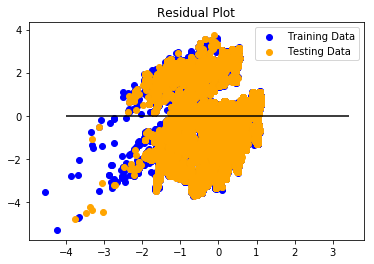

In [52]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [53]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6063782078043282, R2: 0.3956105783059509


In [54]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6240874859268569, R2: 0.3779593826901809


In [55]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6063782084098102, R2: 0.3956105777024548


In [56]:
# Lasso model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6211706631891567, R2: 0.3956105777024548


In [57]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

estimators = [5,10,25,50]
scores = []
for estimate in estimators:
    rf = RandomForestRegressor(n_estimators=estimate)
    rf = rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    scores.append(score)
    print(f"This is the score for {estimate} trees: {score}")
    depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
    num = len(depths)
    #print(depths)
    print(f"average depth of trees in forrest: {sum(depths)/num}")
    print(f"number of trees used {num}")
    print("==============================================================")

/Users/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


This is the score for 5 trees: 0.9849950091812312
average depth of trees in forrest: 58.0
number of trees used 5


/Users/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


This is the score for 10 trees: 0.9857074211536448
average depth of trees in forrest: 59.6
number of trees used 10


/Users/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


This is the score for 25 trees: 0.9861242198628629
average depth of trees in forrest: 59.4
number of trees used 25


/Users/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


This is the score for 50 trees: 0.9862471364033618
average depth of trees in forrest: 60.34
number of trees used 50


In [ ]:
# # Compute the feature importances
# importances = ridge.feature_importances_
# std = np.std([tree.feature_importances_ for tree in ridge.estimators_],
#              axis=0)
# indices = np.argsort(importances)

In [ ]:
# # Plot the feature importances of the model
# plt.figure()
# plt.title("Feature importances")
# plt.barh(range(X.shape[1]), importances[indices],
#        color="r", xerr=std[indices], align="center")
# # If you want to define your own labels,
# # change indices to a list of labels on the following line.
# plt.yticks(range(X.shape[1]), indices)
# plt.ylim([-1, X.shape[1]])
# plt.show()

In [ ]:
# Try the model with the specific contracts

In [58]:
# Assign X (data) and y (target) - missing tTime or kTime

X = julyContract_df[['contractDelivery', 'volume', 'entryDate', 'month', 'ageOrder', 'sec']]
y = julyContract_df["tPrice"].values.reshape(-1, 1)

print(X.shape, y.shape)

(705214, 6) (705214, 1)


In [59]:
X.dtypes

contractDelivery    int64
volume              int64
entryDate           int64
month               int64
ageOrder            int64
sec                 int64
dtype: object

In [60]:
# y_pred_df = julyContract_df[['contractDelivery', 'volume', 'entryDate', 'month', 'ageOrder', 'sec']].values.reshape(1,-1)
y_pred_df = julyContract_df[['contractDelivery', 'volume', 'entryDate', 'month', 'ageOrder', 'sec']]

In [61]:
y_pred_df['sec']=48600

/Users/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
y_pred_df.shape

(705214, 6)

In [64]:
y_pred_df.drop(y_pred_df.index[[1,]])

,contractDelivery,volume,entryDate,month,ageOrder,sec
30511,1807,1,20180501,5,0,48600
30512,1807,1,20180501,5,0,48600
30514,1807,2,20180501,5,0,48600
30515,1807,1,20180501,5,0,48600
30516,1807,1,20180501,5,0,48600
30518,1807,9,20180501,5,0,48600
30517,1807,2,20180501,5,0,48600
30520,1807,1,20180501,5,0,48600
30519,1807,61,20180501,5,0,48600
30521,1807,1,20180501,5,0,48600


In [65]:
# y_pred_df[:-3]
# y_pred_df.drop([0, 1])
# y_pred_df[:-m]
# y_pred_df.drop(df.index[30511:30521])
df2 = y_pred_df.iloc[:1]

In [66]:
df2.values.reshape(-1,1)

array([[    1807],
       [       1],
       [20180501],
       [       5],
       [       0],
       [   48600]], dtype=int64)

In [ ]:
y_pred_df.head()

In [ ]:
y_pred = y_pred_df.values.reshape(-1,1)

In [ ]:
y_pred

In [ ]:
# y_pred_df[0,5]=4
y_pred_df.head()

In [ ]:
y_pred

In [ ]:
y_pred_df.head()

In [ ]:
type(y_predictSettle)

In [67]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [68]:
import traceback

from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data


# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

try:
    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)
except Exception as e:
    print("type error: " + str(e))
    print(traceback.format_exc())
    


In [69]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
X_predict_scaled = X_scaler.transform(df2)


In [70]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# # Compute the feature importances
# importances = model.feature_importances_
# std = np.std([tree.feature_importances_ for tree in model.estimators_],
#              axis=0)
# indices = np.argsort(importances)

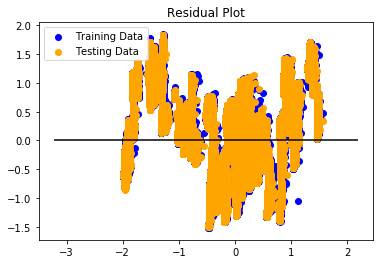

In [72]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [73]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4628110701350356, R2: 0.5368017700913341


In [74]:
X_predict_scaled.shape

(1, 6)

In [75]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

# predictions = elasticnet.predict(X_test_scaled)
predictions = elasticnet.predict(X_test_scaled)
# predictions = elasticnet.predict(X_predict_scaled)
# This is the one to predict the price...

# MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4628110701350356, R2: 0.5014680135996852


In [76]:
predictions

array([ 0.54157926,  0.73460692, -0.51932937, ...,  0.5516809 ,
       -0.66769286, -1.11308592])

In [77]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.46281107144751105, R2: 0.5368017687777608


In [78]:
# Lasso model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4791102950484393, R2: 0.5368017687777608


In [79]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

estimators = [5,10,25,50]
scores = []
for estimate in estimators:
    rf = RandomForestRegressor(n_estimators=estimate)
    rf = rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    scores.append(score)
    print(f"This is the score for {estimate} trees: {score}")
    depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
    num = len(depths)
    #print(depths)
    print(f"average depth of trees in forrest: {sum(depths)/num}")
    print(f"number of trees used {num}")
    print("==============================================================")

/Users/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


This is the score for 5 trees: 0.9472519603985214
average depth of trees in forrest: 53.2
number of trees used 5


/Users/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


This is the score for 10 trees: 0.9498187674542184
average depth of trees in forrest: 52.7
number of trees used 10


/Users/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


This is the score for 25 trees: 0.9512182511388432
average depth of trees in forrest: 52.44
number of trees used 25


/Users/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


This is the score for 50 trees: 0.9517150540339213
average depth of trees in forrest: 53.72
number of trees used 50


In [ ]:
# This is the old version.  Pete's new code is below.

# bigData_df = new_df
# time_step = 300
# bins = np.arange(0,86401,time_step).tolist()
# #labels = bins.apply(lambda x : str(x))
# labels = bins[:-1]
# bigData_df["bins"] = pd.cut(bigData_df["sec"], bins=bins, labels= labels, include_lowest = True)

# binned_means = bigData_df.groupby(['bins']).mean()
# binned_sum = bigData_df.groupby(['bins']).sum()
# binned_max = bigData_df.groupby(['bins']).max()
# binned_min = bigData_df.groupby(['bins']).min()
# binned_count = bigData_df.groupby(['bins']).count()
# binned_describe = bigData_df.groupby(['bins']).describe()

# binned_df = pd.DataFrame(binned_means['tPrice'])
# binned_df['Total Volume'] = binned_sum['volume']
# binned_df['Max Trade Price'] = binned_max['tPrice']
# binned_df['Min Trade Price'] = binned_min['tPrice']
# binned_df['Total # of Trades'] = binned_count['contractDelivery']
# binned_df.reset_index
# binned_df.head(100)



In [ ]:
len(bigData_df)

In [ ]:
# Todd Settles

In [ ]:
bigData

In [80]:
#import settle prices and merge them onto bigData
settlePrices = pd.read_excel('NG1 Settles.xlsx')

bigData_df = pd.merge(bigData_df, settlePrices, how='left', left_on ='kTimeYear', right_on='Dates' )

KeyError: 'kTimeYear'

In [81]:
bigData_df['sec']=pd.to_timedelta(bigData_df.tTime).dt.total_seconds().astype(float)

In [82]:
bigData_df.head(1000)

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime,ageOrder,sec
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0,0.0
42322,20180501,00:00:00,1811,1,2.856,20180501,Tuesday,5,2018-05-01 05:00:00,0,0.0
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00,0,0.0
37771,20180501,00:00:00,1808,1,2.819,20180501,Tuesday,5,2018-05-01 05:00:00,0,0.0
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00,0,0.0
875,20180501,00:00:00,1806,1,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0,0.0
868,20180501,00:00:00,1806,1,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0,0.0
873,20180501,00:00:00,1806,1,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0,0.0
874,20180501,00:00:00,1806,1,2.778,20180501,Tuesday,5,2018-05-01 05:00:00,0,0.0
869,20180501,00:00:00,1806,3,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0,0.0


In [83]:
# The new Code

time_step = 300
bins = np.arange(0,86401,time_step).tolist()
labels = bins[:-1]
bigData_df["bins"] = pd.cut(bigData_df["sec"], bins=bins, labels= labels, include_lowest = True)

days = bigData_df['date'].unique()

agg_binned = pd.DataFrame()
for day in days:
    print(f"now on day: {day}")
    bigData_df_day = bigData_df.loc[bigData_df['date'] == day] 
    binned_means = bigData_df_day.groupby(['bins']).mean()
    binned_sum = bigData_df_day.groupby(['bins']).sum()
    binned_max = bigData_df_day.groupby(['bins']).max()
    binned_min = bigData_df_day.groupby(['bins']).min()
    binned_count = bigData_df_day.groupby(['bins']).count()
    binned_describe = bigData_df_day.groupby(['bins']).describe()

    binned_df = pd.DataFrame(binned_means['tPrice'])
    binned_df['Total Volume'] = binned_sum['volume']
    binned_df['Max Trade Price'] = binned_max['tPrice']
    binned_df['Min Trade Price'] = binned_min['tPrice']
    binned_df['Total # of Trades'] = binned_count['contractDelivery']
    binned_df['Date'] = binned_means['date']
    binned_df["Settle Price"] = 3.000
    binned_df.dropna(how = 'any')
    binned_df.reset_index
    agg_binned = agg_binned.append(binned_df)

agg_binned = agg_binned.loc[agg_binned['Total # of Trades'] != 0]
agg_binned

now on day: 20180501
now on day: 20180502
now on day: 20180503
now on day: 20180504
now on day: 20180507
now on day: 20180508
now on day: 20180509
now on day: 20180510
now on day: 20180511
now on day: 20180514
now on day: 20180515
now on day: 20180516
now on day: 20180517
now on day: 20180518
now on day: 20180521
now on day: 20180522
now on day: 20180523
now on day: 20180524
now on day: 20180525
now on day: 20180528
now on day: 20180529
now on day: 20180530
now on day: 20180531
now on day: 20180601
now on day: 20180604
now on day: 20180605
now on day: 20180606
now on day: 20180607
now on day: 20180608
now on day: 20180611
now on day: 20180612
now on day: 20180613
now on day: 20180614
now on day: 20180615
now on day: 20180618
now on day: 20180619
now on day: 20180620
now on day: 20180621
now on day: 20180622
now on day: 20180625
now on day: 20180626
now on day: 20180627
now on day: 20180628
now on day: 20180629


,tPrice,Total Volume,Max Trade Price,Min Trade Price,Total # of Trades,Date,Settle Price
bins,,,,,,,
0,2.785667,64,2.856,2.776,21,20180501.0,3.0
300,2.777400,9,2.778,2.777,5,20180501.0,3.0
600,2.829867,29,2.966,2.777,15,20180501.0,3.0
900,2.777800,7,2.778,2.777,5,20180501.0,3.0
1200,2.777500,3,2.778,2.777,2,20180501.0,3.0
1500,2.780828,57,2.814,2.777,29,20180501.0,3.0
1800,2.784047,80,2.821,2.779,43,20180501.0,3.0
2100,2.792809,221,2.970,2.779,47,20180501.0,3.0
2400,2.780762,37,2.815,2.778,21,20180501.0,3.0


In [ ]:
agg_binned.head(100)

In [ ]:
len(agg_binned)

In [ ]:
# Run on the new binned data

In [84]:
# Assign X (data) and y (target) - missing tTime or kTime

X = agg_binned[['tPrice', 'Total Volume', 'Max Trade Price', 'Min Trade Price', 'Total # of Trades', 'Date']]
y = agg_binned["Settle Price"].values.reshape(-1, 1)
# y = random_df["Settle Price"].values.reshape(-1, 1)
# y.reshape(-1,1)
print(X.shape, y.shape)

(12011, 6) (12011, 1)


In [85]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [86]:
import traceback

from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data


# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

try:
    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)
except Exception as e:
    print("type error: " + str(e))
    print(traceback.format_exc())
    


In [87]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
X_predict_scaled = X_scaler.transform(df2)


In [88]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0, R2: 1.0


In [89]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0, R2: 1.0


In [ ]:
y

In [ ]:
y = np.random.uniform(low=0.5, high=3.3, size=(12055,))

In [ ]:
y.tolist()

In [ ]:
y.shape

In [ ]:
random_df = agg_binned

In [ ]:
random_df['Settle Price'] = (np.random.randint(200, 300, random_df.shape[0]))/100

In [ ]:
random_df.head(100)

In [ ]:
# This is junk yard  nothing below -- use at your own risk

In [ ]:
# Add a kSeconds column to help do analysis

bigData_df['kSeconds'] = bigData_df['kTime']

# x = time.strptime(time_df.iloc[1,0],'%H:%M:%S')
# datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

In [ ]:
bigData_df.head()

In [ ]:
x=bigData_df['tTime'].apply(lambda t:time.strptime(t,'%H:%M:%S'))

In [ ]:
# bigData['parsedTime']=x

In [ ]:
bigData.head()

In [ ]:
# create the kSeconds to seconds by parsing the entire row.

x = time.strptime(bigData_df['tTime'],'%H:%M:%S')
# bigData_df['seconds']=datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

In [ ]:
sorted_df.iloc[1,29]

In [ ]:
# sorted_df['kSeconds'] = sorted_df['kSeconds'].apply(lambda x: datetime.timedelta(hours=sorted_df['kTime'].tm_hour,minutes=sorted_df['kTime'].tm_min,seconds=sorted_df['kTime'].tm_sec).total_seconds())



In [ ]:
bigData_df['tTime'].dtype

In [ ]:
y = len(sorted_df)

In [ ]:
for y in range(len(sorted_df)):
    x = time.strptime(sorted_df.iloc[y,1],'%H:%M:%S')
    sorted_df.iloc[y,29]=datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds() 

In [ ]:
y

In [ ]:
# Drop columns with no data dont run
bigData_df = bigData.drop(["AB",'IND','MKQ','CO','VOE','PC','CAN','INS','FL','CAB','BKI'], axis=1)
bigData_df

In [ ]:
cleaner_df = cleaner_df[(cleaner_df.CO != "0") & (cleaner_df.volume != 0)]
cleaner_df.count()

In [ ]:
bigData_df = sorted_df.drop(["AB",'IND','MKQ','VOE','PC','CAN','INS','FL','CAB','BKI'], axis=1)
bigData_df = bigData_df[(bigData_df.CO != "0") & (bigData_df.volume != 0)]
bigData_df.count()

In [ ]:
bigData_df.head()

In [ ]:
bigData_df = bigData_df.drop(['CO'], axis=1)

In [ ]:
bigData_df.head()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
time_df = cleaner_df.drop(['date', 'sequenceNbr', 'exchCode','sessionInd', 'symbol', "CPF", 'contractDelivery', 'volume', 'strikePrice', 'entryDate', 'stringDate', 'dow' ], axis=1)

In [ ]:
time_df = time_df.drop(['month', 'kTimeYear', 'kTimeTime', 'kTime'], axis=1)

In [ ]:
time_df.head()

In [ ]:
time_df.columns

In [ ]:
time_df['kSeconds'] = time_df['tTime'].dt.total_seconds()

In [ ]:
# time_df['tTime'] = time_df['tTime'].astype('float64') 
type(time_df['tTime'])

In [ ]:
mah_np_array = time_df.as_matrix(columns=None)

In [ ]:
mah_np_array

In [ ]:
# time_df.iloc[1,0]
x = time.strptime(time_df.iloc[1,0],'%H:%M:%S')
datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

In [ ]:
import datetime
import time
x = time.strptime('00:01:00','%H:%M:%S')
datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()


In [ ]:
# Plot the data
plt.scatter(mah_np_array[:, 0], mah_np_array[:, 1])

In [ ]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [ ]:
# Fit the model to the data
kmeans.fit(mah_np_array)

In [ ]:
type(mah_np_array)

In [ ]:
# Predict the clusters
predicted_clusters = kmeans.predict(mah_np_array)

In [ ]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(mah_np_array[:, 0], mah_np_array[:, 1], c=predicted_clusters, s=50, cmap='viridis')

In [ ]:
# day1 = pd.read_csv('20180502-TICK_xnym_ng_fut_0-eth.csv', names=colnames, header=None)

In [ ]:
# day1.dtypes

In [ ]:
# day1.infer_objects()

In [ ]:
# day1.columns[6]

In [ ]:
# day1.drop(day1.columns[5], axis=1, inplace=True)
# day1.shape

In [ ]:
bigData.groupby('CPF')


In [ ]:
bigData.sort_values('CPF')

In [ ]:
newDF = bigData[(bigData['CO'] == "O")]

In [ ]:
newDF

In [ ]:
bigData.groupby('contractDelivery').count()

In [ ]:
bigData.head()


In [ ]:
bigData['tTime']

In [ ]:
df = bigData

In [ ]:
type(df.iloc[4,1])

In [ ]:
type(df.iloc[0,0])

In [ ]:
df.iloc[0,0]